In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns 

In [4]:
df = pd.read_csv('covid_19_data.csv')

In [5]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 8 columns):
SNo                3992 non-null int64
ObservationDate    3992 non-null object
Province/State     2594 non-null object
Country/Region     3992 non-null object
Last Update        3992 non-null object
Confirmed          3992 non-null float64
Deaths             3992 non-null float64
Recovered          3992 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 249.6+ KB


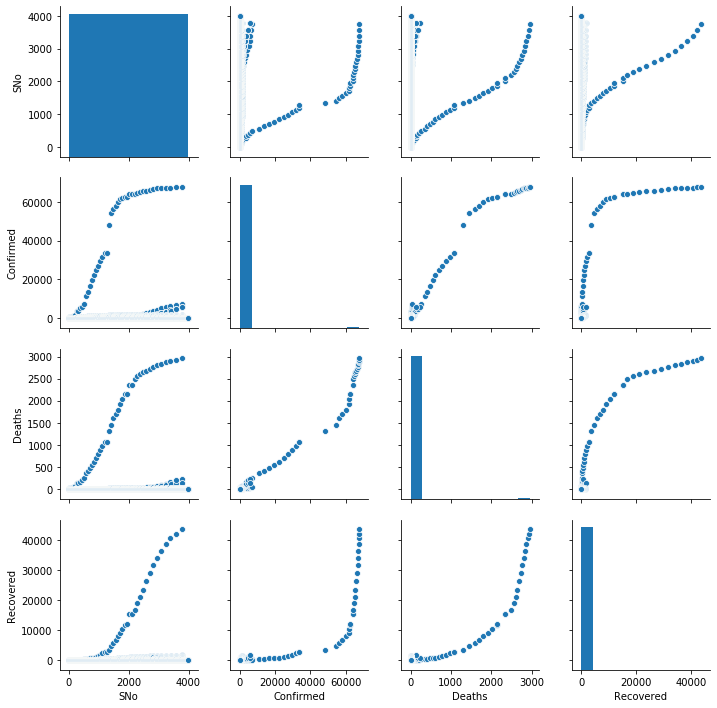

In [8]:
sns.pairplot(df)

In [14]:
df['Still Infected'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [17]:
del df['still infected']

In [19]:
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')

In [20]:
df['Country/Region'].unique()

array(['China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand',
       'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam',
       'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal',
       'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany',
       'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK',
       'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran',
       'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain',
       'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland',
       'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway',
       'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino',
       ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand',
       'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco',
       'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Moroc

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lm = LinearRegression()

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Still Infected'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
ls = LabelEncoder()

In [32]:

df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
Still Infected     float64
dtype: object

In [109]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Still Infected
0,1,0,3,3,0,1.0,0.0,0.0,1.0
1,2,0,7,3,0,14.0,0.0,0.0,14.0
2,3,0,19,3,0,6.0,0.0,0.0,6.0
3,4,0,39,3,0,1.0,0.0,0.0,1.0
4,5,0,41,3,0,0.0,0.0,0.0,0.0


In [110]:
numeric_columns = df[['Province/State', 'Country/Region']]

In [111]:
le = LabelEncoder()

In [112]:
df = df[df['Province/State'].notna()]

In [113]:
df[['Province/State', 'Country/Region', 'ObservationDate', 'Last Update']] = df[['Province/State', 'Country/Region', 'ObservationDate', 'Last Update']].apply(le.fit_transform)

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [237]:
rfc = RandomForestClassifier(n_estimators=200)

In [238]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Still Infected
0,1,0,3,3,0,1.0,0.0,0.0,1.0
1,2,0,7,3,0,14.0,0.0,0.0,14.0
2,3,0,19,3,0,6.0,0.0,0.0,6.0
3,4,0,39,3,0,1.0,0.0,0.0,1.0
4,5,0,41,3,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3987,3988,45,89,0,800,0.0,0.0,0.0,0.0
3988,3989,45,70,12,556,0.0,0.0,0.0,0.0
3989,3990,45,82,12,855,0.0,0.0,0.0,0.0
3990,3991,45,91,12,556,0.0,0.0,0.0,0.0


In [239]:
X = df.drop(['Deaths', 'Recovered', 'Confirmed', 'Still Infected'], axis=1)
X

,SNo,ObservationDate,Province/State,Country/Region,Last Update
0,1,0,3,3,0
1,2,0,7,3,0
2,3,0,19,3,0
3,4,0,39,3,0
4,5,0,41,3,0
...,...,...,...,...,...
3987,3988,45,89,0,800
3988,3989,45,70,12,556
3989,3990,45,82,12,855
3990,3991,45,91,12,556


In [240]:
y = df['Deaths'] 

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [242]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
y_pred = lm.predict(X_test)

In [245]:
lm.coef_

array([-0.05845186,  4.45653231, -0.25612597, -2.41848512,  0.077807  ])

In [246]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [247]:
coef_df

,Coeff
SNo,-0.058452
ObservationDate,4.456532
Province/State,-0.256126
Country/Region,-2.418485
Last Update,0.077807


In [248]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [249]:
df_pred = df_pred.loc[~(df_pred==0.0).all(axis=1)]

In [250]:
df_pred.head(25)

,Actual,Predicted
3703,0.0,-1.162108
345,0.0,1.439283
997,0.0,6.862307
4,0.0,1.412787
2487,1.0,57.194056
3733,0.0,23.228839
936,0.0,3.760345
247,0.0,-32.262412
1531,0.0,21.259460
802,0.0,-16.580282


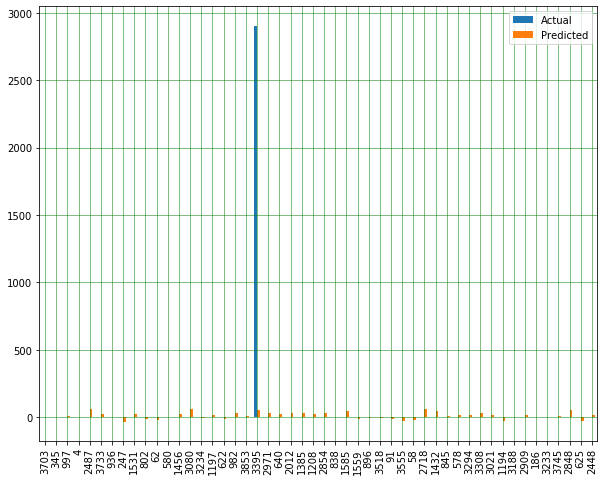

In [251]:
df_pred.head(50).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [252]:
X_test.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update
3703,3704,44,129,12,795
345,346,7,87,3,7
997,998,17,153,3,211
4,5,0,41,3,0
2487,2488,36,64,3,596


In [253]:
test_cases = {
    'SNo': 4000,
    'ObservationDate': 45,
    'Province/State': 50, 
    'Country/Region': 50, 
    'Last Update': 540, 
}

In [254]:
test_predictions = pd.DataFrame([test_cases])

In [255]:
test_predictions

,SNo,ObservationDate,Province/State,Country/Region,Last Update
0,4000,45,50,50,540


In [256]:
X_test

,SNo,ObservationDate,Province/State,Country/Region,Last Update
3703,3704,44,129,12,795
345,346,7,87,3,7
997,998,17,153,3,211
4,5,0,41,3,0
2487,2488,36,64,3,596
...,...,...,...,...,...
922,923,16,120,3,183
1876,1877,29,121,3,459
2843,2844,39,47,3,595
2081,2082,31,127,0,388


In [257]:
new_pred = lm.predict(test_predictions)

In [258]:
type(new_pred[0])

numpy.float64

In [259]:
import decimal

In [260]:
decimal.Decimal(new_pred[0])

Decimal('-105.5165957021580425134743563830852508544921875')